In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import datetime as dt


%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 120
warnings.filterwarnings('ignore')

#### Loading Dataset

In [17]:
df = pd.read_csv("C:/Users/admin/Desktop/EDA assignment/takehome_user_engagement.csv")

In [18]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [20]:
df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [21]:
df.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

##### find year week comination

In [24]:
# Convert time stamp column to date time format
df.time_stamp = pd.to_datetime(df.time_stamp)

In [25]:
# Extracting year-week combination for every date
df['year_week'] = df['time_stamp'].dt.strftime("%Y-%U")

In [26]:
# time
df['time'] = df['time_stamp'].dt.strftime('%H.%M')
# year
df['year'] = df['time_stamp'].dt.year
# month
df['month'] = df['time_stamp'].dt.month

In [27]:
df

,time_stamp,user_id,visited,year_week,time,year,month
0,2014-04-22 03:53:30,1,1,2014-16,03.53,2014,4
1,2013-11-15 03:45:04,2,1,2013-45,03.45,2013,11
2,2013-11-29 03:45:04,2,1,2013-47,03.45,2013,11
3,2013-12-09 03:45:04,2,1,2013-49,03.45,2013,12
4,2013-12-25 03:45:04,2,1,2013-51,03.45,2013,12
...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-35,06.14,2013,9
207913,2013-01-15 18:28:37,11997,1,2013-02,18.28,2013,1
207914,2014-04-27 12:45:16,11998,1,2014-17,12.45,2014,4
207915,2012-06-02 11:55:59,11999,1,2012-22,11.55,2012,6


In [29]:
df.year_week.value_counts()

2014-19    4809
2014-20    4804
2014-18    4747
2014-17    4663
2014-16    4483
           ... 
2012-27     123
2012-25      96
2012-24      95
2012-23      72
2012-22      19
Name: year_week, Length: 108, dtype: int64

### Find adopted users 

-----

- Adopted users are the users who had logged in more than 3 times in a week.

In [30]:
# Find Frequency of users login time
df3 = df.groupby(['year_week','user_id','time'])['time_stamp'].count().reset_index(name="freq")
df3.head(10)

,year_week,user_id,time,freq
0,2012-22,1693,21.58,1
1,2012-22,1995,13.14,1
2,2012-22,2120,21.42,1
3,2012-22,3428,15.47,1
4,2012-22,3514,00.28,1
5,2012-22,3721,09.08,1
6,2012-22,4584,06.37,1
7,2012-22,6102,00.17,1
8,2012-22,7170,06.23,1
9,2012-22,7286,09.39,1


In [31]:
# Adopted users
adopted_users_df = df3[df3.freq >= 3]
adopted_users_df

,year_week,user_id,time,freq
89,2012-24,728,16.04,3
182,2012-25,1693,21.58,3
204,2012-25,4835,03.07,3
315,2012-26,6171,02.05,3
340,2012-26,9312,11.49,3
...,...,...,...,...
69637,2014-22,11762,23.00,3
69639,2014-22,11806,09.48,3
69640,2014-22,11836,02.40,3
69644,2014-22,11895,04.14,4


In [32]:
adopted_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33804 entries, 89 to 69646
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year_week  33804 non-null  object
 1   user_id    33804 non-null  int64 
 2   time       33804 non-null  object
 3   freq       33804 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [33]:
# save
adopted_users_df.to_csv('takehome_users_clean_2.csv')

In [34]:
adopted_users_df['time'] = adopted_users_df['time'].astype(float)

In [35]:
def time_period(df):
    if df.time >=0 and df.time <3:
        return 'middle of night'
    elif df.time >= 3 and df.time <6:
        return 'early morning'
    elif df.time >= 6 and df.time <9:
        return 'morning'
    elif df.time >=9 and df.time <12:
        return 'late morning'
    elif df.time >= 12 and df.time <15:
        return 'midday-noon'
    elif df.time >= 15 and df.time <18:
        return 'afternoon'
    elif df.time >= 18 and df.time < 21:
        return 'evening'
    elif df.time >= 21 and df.time <= 24:
        return 'late evening - midnight'
    

adopted_users_df['time_period'] = adopted_users_df.apply(time_period, axis=1)

In [36]:
adopted_users_df.head(15)

,year_week,user_id,time,freq,time_period
89,2012-24,728,16.04,3,afternoon
182,2012-25,1693,21.58,3,late evening - midnight
204,2012-25,4835,3.07,3,early morning
315,2012-26,6171,2.05,3,middle of night
340,2012-26,9312,11.49,3,late morning
361,2012-27,69,10.15,4,late morning
391,2012-27,3623,14.34,3,midday-noon
403,2012-27,5297,17.32,3,afternoon
419,2012-27,6978,15.25,3,afternoon
424,2012-27,7590,0.51,3,middle of night


### Save the DataFrame to a csv file


In [37]:
# Save the dataframe
adopted_users_df.to_csv("Adopted_users.csv")

print("A new csv file has been generated.../")

A new csv file has been generated.../


In [38]:
### Analysis

In [39]:
#### Number of users frequently visited the service site,

In [40]:
df2.columns

NameError: name 'df2' is not defined

In [ ]:
# Number of active users
df2.user_id.nunique()

In [ ]:
# percentage of active users
round((df2.user_id.nunique() / df1.object_id.nunique()) * 100, 2)

In [ ]:
# Extract month and year from timestamp
df2['year'] = df2.time_stamp.dt.year
df2['month'] = df2.time_stamp.dt.month

In [41]:
df2.head()

NameError: name 'df2' is not defined

In [42]:
sns.FacetGrid(df2, hue='year', aspect=4).map(sns.kdeplot, 'month', shade=True)
plt.legend(labels=[2012, 2013, 2014])
plt.title("Distribution of active users over the year")
plt.show()

NameError: name 'df2' is not defined

In [43]:
#### Adopted Users

In [44]:
# Total Number of adopted users
adopted_users_df.user_id.nunique()

1432

In [56]:
# Percentage of adopted users
round((adopted_users_df.user_id.nunique() / df.shape[0] * 100, 2))

TypeError: type tuple doesn't define __round__ method

In [46]:
# Frequency in adopted user
adopted_users_df.freq.value_counts()

3    9592
4    7484
7    6549
5    5667
6    4512
Name: freq, dtype: int64

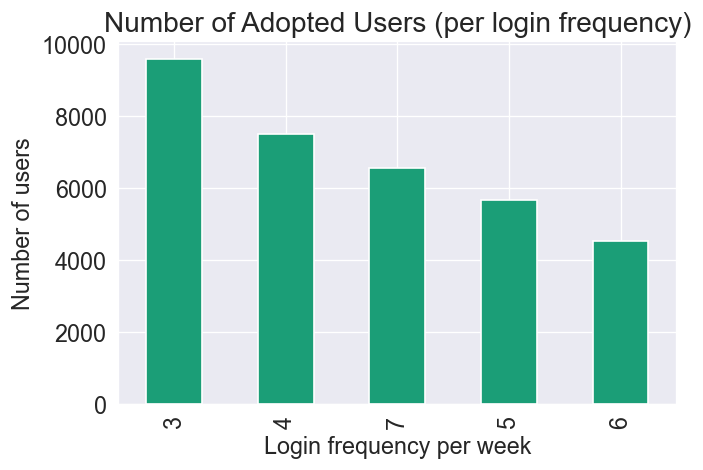

In [47]:
# Bar chart for adopted users
adopted_users_df.freq.value_counts().plot(kind='bar', stacked=True, colormap='Dark2')
plt.title("Number of Adopted Users (per login frequency)")
plt.xlabel("Login frequency per week")
plt.ylabel("Number of users")
plt.show()

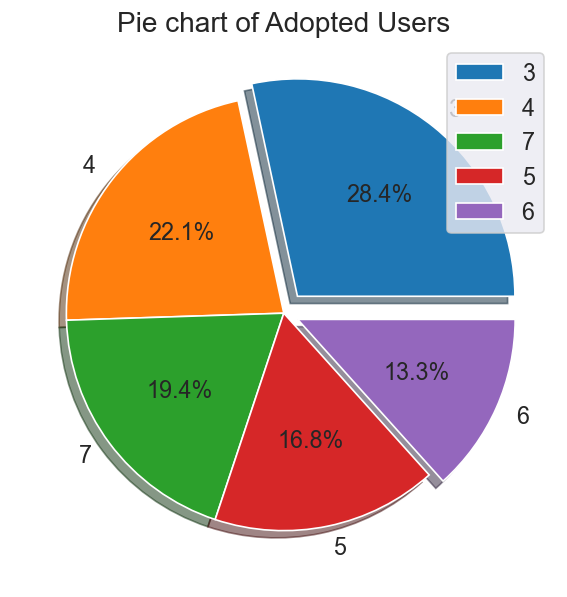

In [48]:
# Pie Chart for adopted Users
fig = plt.figure(figsize=(8,6))
adopted_users_df.freq.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(.1, 0, 0, 0, 0.07), shadow=True)
plt.title("Pie chart of Adopted Users")
plt.legend()
plt.ylabel('')
plt.show()

In [49]:
adopted_users_df

,year_week,user_id,time,freq,time_period
89,2012-24,728,16.04,3,afternoon
182,2012-25,1693,21.58,3,late evening - midnight
204,2012-25,4835,3.07,3,early morning
315,2012-26,6171,2.05,3,middle of night
340,2012-26,9312,11.49,3,late morning
...,...,...,...,...,...
69637,2014-22,11762,23.00,3,late evening - midnight
69639,2014-22,11806,9.48,3,late morning
69640,2014-22,11836,2.40,3,middle of night
69644,2014-22,11895,4.14,4,early morning


In [50]:
adopted_users_df.columns

Index(['year_week', 'user_id', 'time', 'freq', 'time_period'], dtype='object')

In [51]:
period = adopted_users_df.time_period.value_counts().to_frame()
period.rename_axis(columns={'time_period': 'total_users'}, inplace=True)
period.reset_index(inplace=True)
period.rename_axis(columns={'index':'time_period'}, inplace=True)
period

,index,time_period
0,afternoon,4586
1,evening,4539
2,late evening - midnight,4490
3,early morning,4415
4,late morning,4154
5,midday-noon,4023
6,morning,3817
7,middle of night,3780


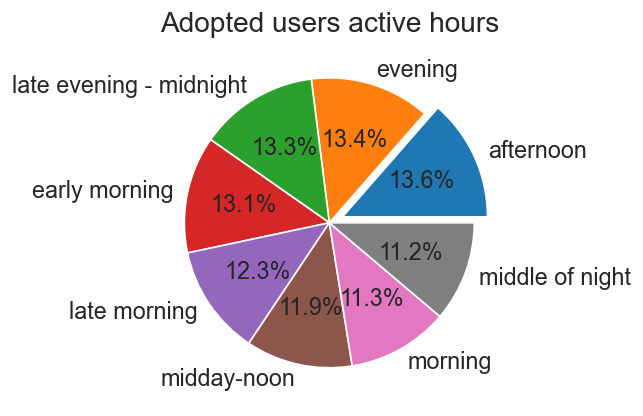

In [52]:
adopted_users_df.time_period.value_counts().plot(kind='pie', autopct="%1.1f%%", explode=(0.1, 0,0,0,0,0,0,0))
plt.title("Adopted users active hours")
plt.ylabel('');

## Insights from the User Engagement data:

---

1. There are 8823 (73.52%) active users, out of which 1432 (== 12%) are adopted users.
2. 28.4% adopted users visit the site 3 times in a week. Similarly, 22.1% visits 4 times, 19.4% visits 7 times and only 13.3% visits 6 times in a week. 